<a href="https://github.com/glebsamarec">Самарец Глєб</a>, 2024

#### <h1 align="center">Лабораторна робота №7. Методи кластеризації (навчання без учителя)
</h1>

<h2> Завдання для самостійної роботи </h2>

<ol>
   <b> <li>1.Реалізувати всі алгоритми кластеризації, наведені в роботі, для свого варіанта, обгрунтувавши знаення відповідних параметрів.</li>

</ol>
<h2>Алгоритм K-середніх</h2> 

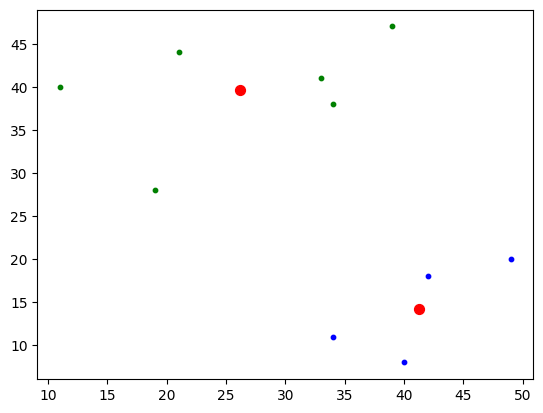

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Ваши данные
x_train_2 = np.array([[34, 11],
                      [34, 38],
                      [40, 8],
                      [42, 18],
                      [33, 41],
                      [39, 47],
                      [11, 40],
                      [21, 44],
                      [19, 28],
                      [49, 20]])

y_train_2 = np.array([-1, -1, -1, 1, 1, 1, -1, 1, -1, 1])

# Адаптация данных к формату исходного алгоритма
x = x_train_2

# Вычисление средних и дисперсий
M = np.mean(x, axis=0)
D = np.var(x, axis=0)

# Определение количества кластеров
K = len(np.unique(y_train_2))

# Генерация начальных центров кластеров
ma = [np.random.normal(M, np.sqrt(D / 10), 2) for n in range(K)]

# Функция для вычисления евклидовой метрики
ro = lambda x_vect, m_vect: np.mean((x_vect - m_vect) ** 2)

# Колорирование кластеров
COLORS = ('green', 'blue', 'brown', 'black')

# Инициализация графика
plt.ion()

n = 0
while n < 10:
    X = [[] for i in range(K)]

    for x_vect, y_label in zip(x, y_train_2):
        r = [ro(x_vect, m) for m in ma]
        X[np.argmin(r)].append(x_vect)

    ma = [np.mean(xx, axis=0) for xx in X]

    plt.clf()

    # Отображение кластеров
    for i in range(K):
        xx = np.array(X[i]).T
        plt.scatter(xx[0], xx[1], s=10, color=COLORS[i])

    # Отображение центров кластеров
    mx = [m[0] for m in ma]
    my = [m[1] for m in ma]
    plt.scatter(mx, my, s=50, color='red')

    plt.draw()
    plt.gcf().canvas.flush_events()

    n += 1

plt.ioff()
plt.show()


<h2>Алгоритм DBSCAN</h2> 

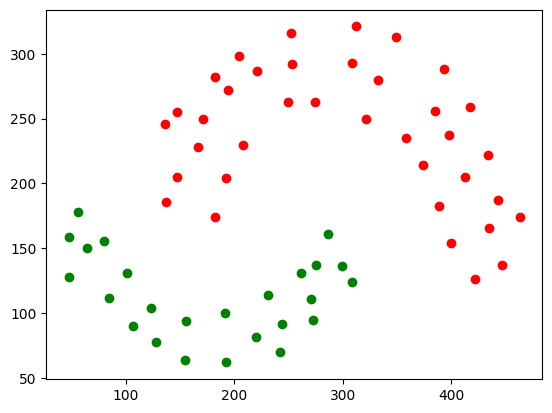

In [9]:
from itertools import cycle
from math import hypot
import matplotlib.pyplot as plt

def dbscan_naive(P, eps, m, distance):
    NOISE = 0
    C = 0

    visited_points = set()
    clustered_points = set()
    clusters = {NOISE: []}

    def region_query(p):
        return [q for q in P if distance(p, q) < eps]

    def expand_cluster(p, neighbours):
        if C not in clusters:
            clusters[C] = []
        clusters[C].append(p)
        clustered_points.add(p)
        while neighbours:
            q = neighbours.pop()
            if q not in visited_points:
                visited_points.add(q)
                neighbourz = region_query(q)
                if len(neighbourz) >= m:
                    neighbours.extend(neighbourz)
            if q not in clustered_points:
                clustered_points.add(q)
                clusters[C].append(q)
                if q in clusters[NOISE]:
                    clusters[NOISE].remove(q)

    for p in P:
        if p in visited_points:
            continue
        visited_points.add(p)
        neighbours = region_query(p)
        if len(neighbours) < m:
            clusters[NOISE].append(p)
        else:
            C += 1
            expand_cluster(p, neighbours)

    return clusters

P = [(64, 150), (84, 112), (106, 90), (154, 64), (192, 62), (220, 82), (244, 92), (271, 111), (275, 137), (286, 161), (56, 178), (80, 156), (101, 131), (123, 104), (155, 94), (191, 100), (242, 70), (231, 114), (272, 95), (261, 131), (299, 136), (308, 124), (128, 78), (47, 128), (47, 159), (137, 186), (166, 228), (171, 250), (194, 272), (221, 287), (253, 292), (308, 293), (332, 280), (385, 256), (398, 237), (413, 205), (435, 166), (447, 137), (422, 126), (400, 154), (389, 183), (374, 214), (358, 235), (321, 250), (274, 263), (249, 263), (208, 230), (192, 204), (182, 174), (147, 205), (136, 246), (147, 255), (182, 282), (204, 298), (252, 316), (312, 321), (349, 313), (393, 288), (417, 259), (434, 222), (443, 187), (463, 174)]

# Розмір епсилон-околу
eps = 60    
# Мінімальна кількість об'єктів для повного епсилон-околу
m = 5       

clusters = dbscan_naive(P, eps, m, lambda x, y: hypot(x[0] - y[0], x[1] - y[1]))
for c, points in zip(cycle('bgrcmykgrcmykgrcmykgrcmykgrcmykgrcmyk'), clusters.values()):
    X = [p[0] for p in points]
    Y = [p[1] for p in points]
    plt.scatter(X, Y, c=c)
plt.show()


<h2>Алгоритм K-середніх</h2> 

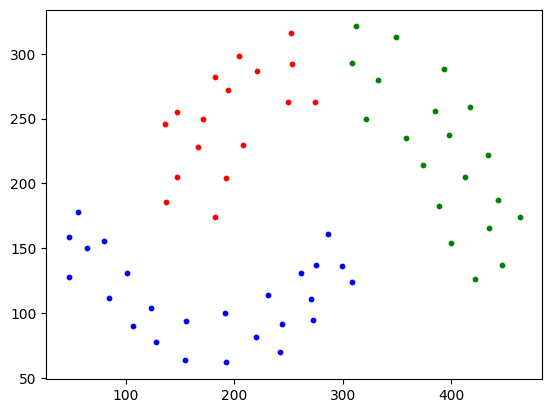

In [10]:
from itertools import cycle
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt

# вхідні зображення для кластеризації
x = [(64, 150), (84, 112), (106, 90), (154, 64), (192, 62), (220, 82), (244, 92), (271, 111), (275, 137), (286, 161), (56, 178), (80, 156), (101, 131), (123, 104), (155, 94), (191, 100), (242, 70), (231, 114), (272, 95), (261, 131), (299, 136), (308, 124), (128, 78), (47, 128), (47, 159), (137, 186), (166, 228), (171, 250), (194, 272), (221, 287), (253, 292), (308, 293), (332, 280), (385, 256), (398, 237), (413, 205), (435, 166), (447, 137), (422, 126), (400, 154), (389, 183), (374, 214), (358, 235), (321, 250), (274, 263), (249, 263), (208, 230), (192, 204), (182, 174), (147, 205), (136, 246), (147, 255), (182, 282), (204, 298), (252, 316), (312, 321), (349, 313), (393, 288), (417, 259), (434, 222), (443, 187), (463, 174)]

# Адаптация данных к формату, подходящему для sklearn
x = np.array(x)

NC = 3  # максимальна кількість кластерів (кінцевих)

# агломеративна ієрархічна кластеризація
clustering = AgglomerativeClustering(n_clusters=NC, linkage="ward")
x_pr = clustering.fit_predict(x)

# відображення результату кластеризації
for c, n in zip(cycle('bgrcmykgrcmykgrcmykgrcmykgrcmykgrcmyk'), range(NC)):
    clst = x[x_pr == n].T
    plt.scatter(clst[0], clst[1], s=10, color=c)

plt.show()


<h1 align="center">Контрольні запитання</h1>

1.У чому полягає задача кластеризації та які її цілі?
<br><br>
   <b>
Кластеризація полягає в групуванні схожих об'єктів у колекції. Мета полягає в тому, щоб об'єкти всередині одного кластера були якомога більш схожими між собою, а об'єкти між різними кластерами були якомога менш схожими. Основні цілі кластеризації включають в себе виявлення природних груп об'єктів у даних, розуміння структури даних та спрощення подальшого аналізу даних.
</b>
<br><br>
2.Які критерії використовуються для оцінки якості розбиття об’єктів на групи у задачі кластеризації?
  <br><br>
   <b>
  Критерії, які використовуються для оцінки якості кластеризації, можуть включати метрики внутрішнього та зовнішнього зв'язку. Деякі популярні метрики включають індекс силуету, додаткову дисперсію, кількість кластерів, довжину периметра та інші.
  </b>
   <br><br>
3.Що таке задача часткового навчання в контексті кластеризації? У чому полягаєЯка ідея алгоритму k-середніх (k-means)? У чому полягаєновна ідея алгоритму DBSCANn.
<br><br>
<b> 
Задача часткового навчання в контексті кластеризації:
Задача часткового навчання виникає, коли доступні лише деякі мітки класів для обмеженого підмножини даних. У контексті кластеризації це може означати, що ми маємо деякі мітки класів для об'єктів у деяких кластерах, але інші об'єкти можуть бути непозначеними. Мета полягає в тому, щоб використовувати ці обмежені мітки класів для навчання моделі кластеризації, щоб покращити якість розбиття.
<br><br>
Алгоритм k-середніх (k-means):
Ключова ідея алгоритму k-середніх полягає в тому, щоб згрупувати об'єкти в k кластерів, мінімізуючи середній квадрат відстаней між кожним об'єктом і центром його кластера.
<br><br>
Алгоритм DBSCAN:
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) — це алгоритм кластеризації, який групує об'єкти у кластери на основі їх густини в просторі ознак. Основна ідея полягає в тому, щоб виявити області в просторі даних з високою густиністю, які відповідають кластерам, і розділити області з низькою густиністю або окремі точки як шум.
</b>
<br><br>
4.Як можна скористатися засобами бібліотеки scikit-learn для реалізації алгоритму DBSCAN на Python?
<br><br>
   <b>
Реалізація алгоритму DBSCAN за допомогою scikit-learn:
Можна використати модуль sklearn.cluster.DBSCAN для реалізації алгоритму DBSCAN в Python засобами бібліотеки scikit-learn. Це дає можливість використовувати різні параметри, такі як радіус епсилон і мінімальна кількість сусідів, для налаштування алгоритму залежно від конкретних потреб.
  </b>